In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


wines_red = pd.read_csv("winequality-red.csv", sep=';', header=0)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

col_name = wines_red.columns.tolist()
print(col_name)

wines_red = remove_outliers(wines_red,col_name)

for col in col_name:
    wines_red[col] = pd.to_numeric(wines_red[col], errors='coerce')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# Box Plots
### Red Wines
This next section displays a graph for each attribute for red wines in a boxplot as well as all of them side by side.

In [23]:
# Display red wine summaries for each subset of attributes
print(wines_red.iloc[:, 0:5].describe())
print(wines_red.iloc[:, 5:9].describe())
print(wines_red.iloc[:, 10:12].describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1550.000000       1580.000000  1598.000000     1444.000000   
mean        8.162581          0.520554     0.270519        2.179848   
std         1.513582          0.166581     0.194006        0.449141   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.100000   
75%         9.100000          0.630000     0.420000        2.500000   
max        12.300000          1.010000     0.790000        3.650000   

         chlorides  
count  1487.000000  
mean      0.078756  
std       0.014865  
min       0.041000  
25%       0.070000  
50%       0.078000  
75%       0.087000  
max       0.119000  
       free sulfur dioxide  total sulfur dioxide      density           pH
count          1569.000000           1544.000000  1554.000000  1564.000000
mean             15.1

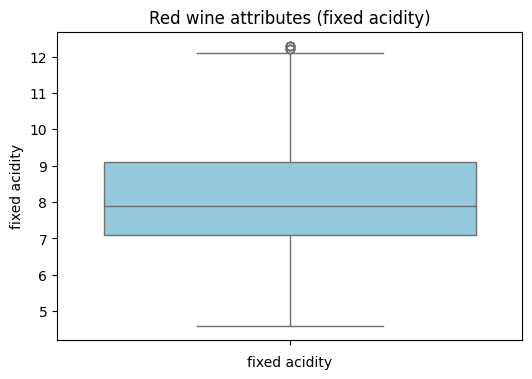

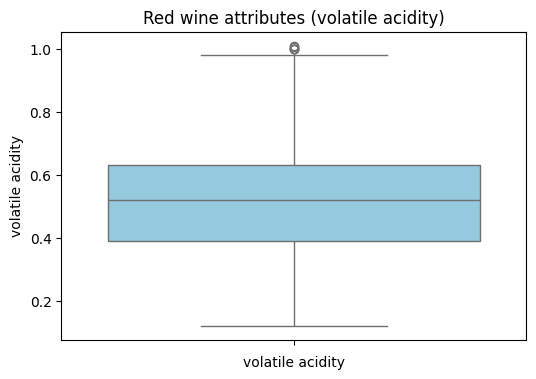

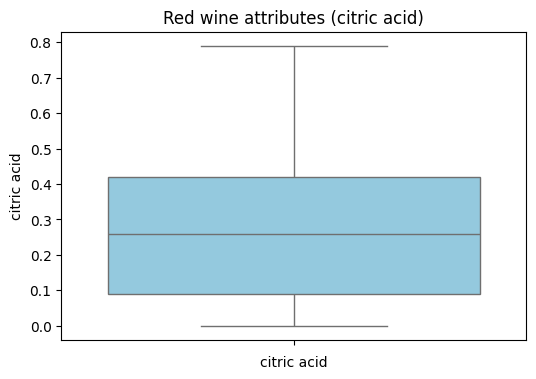

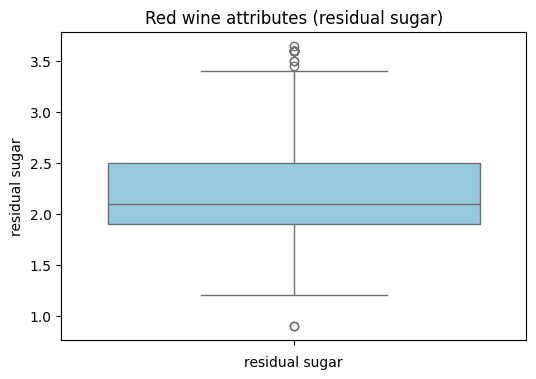

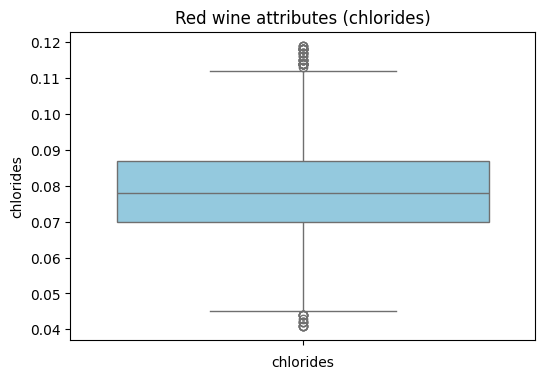

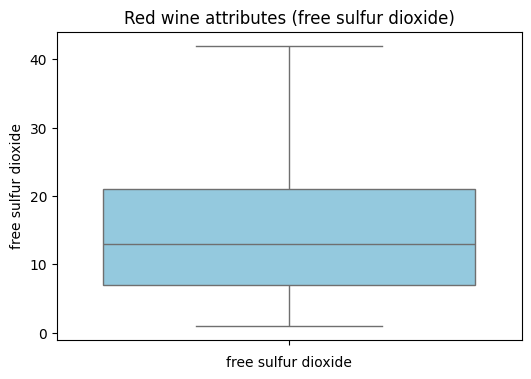

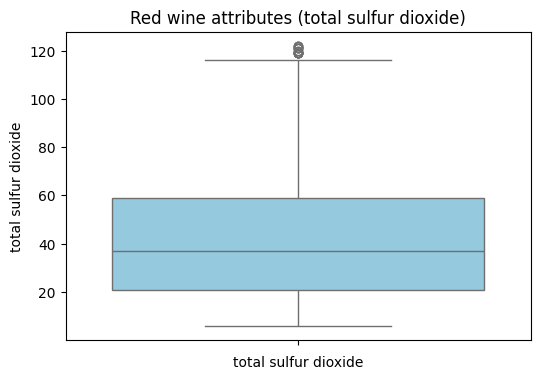

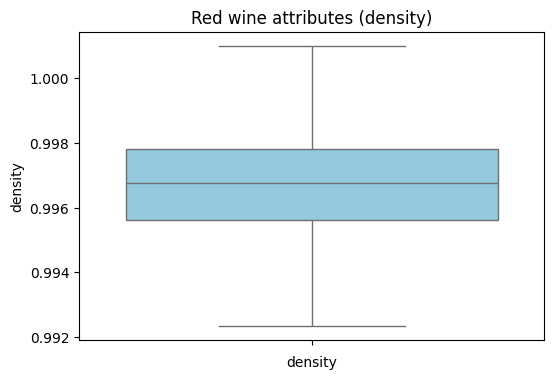

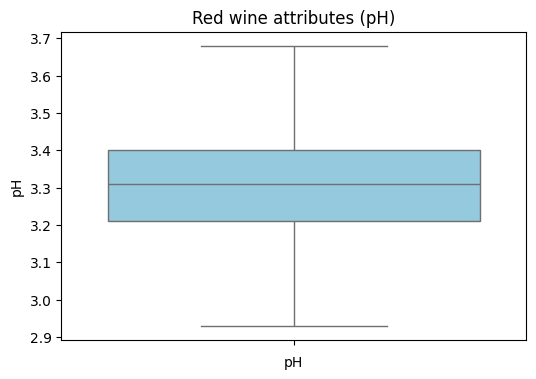

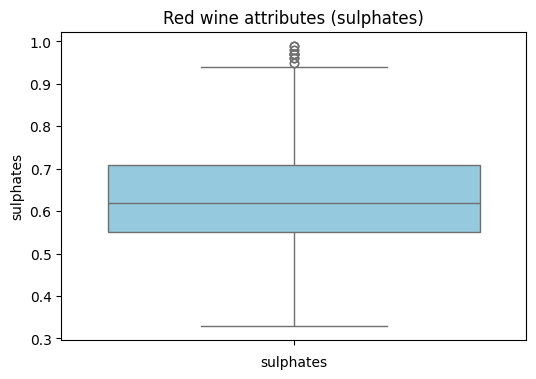

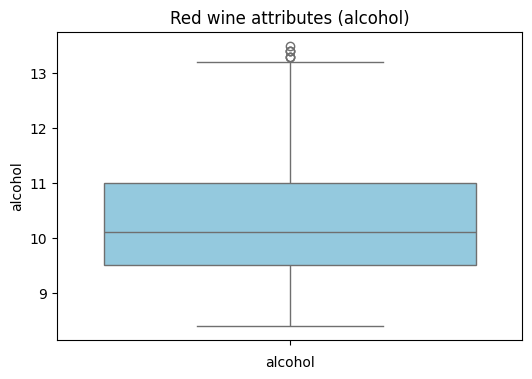

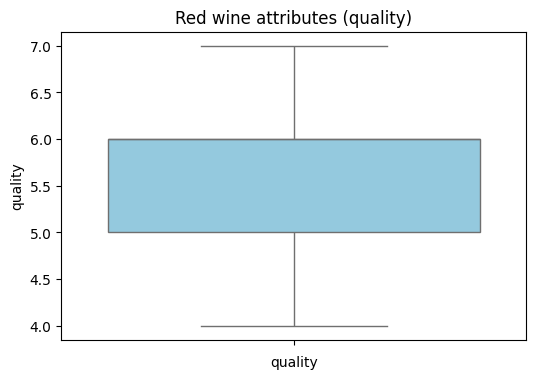

In [24]:
# Single boxplots for each red wine attributes
for i, col in enumerate(col_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=wines_red[col], color="skyblue")
    plt.title(f"Red wine attributes ({col})")
    plt.xlabel(col)
    plt.show()

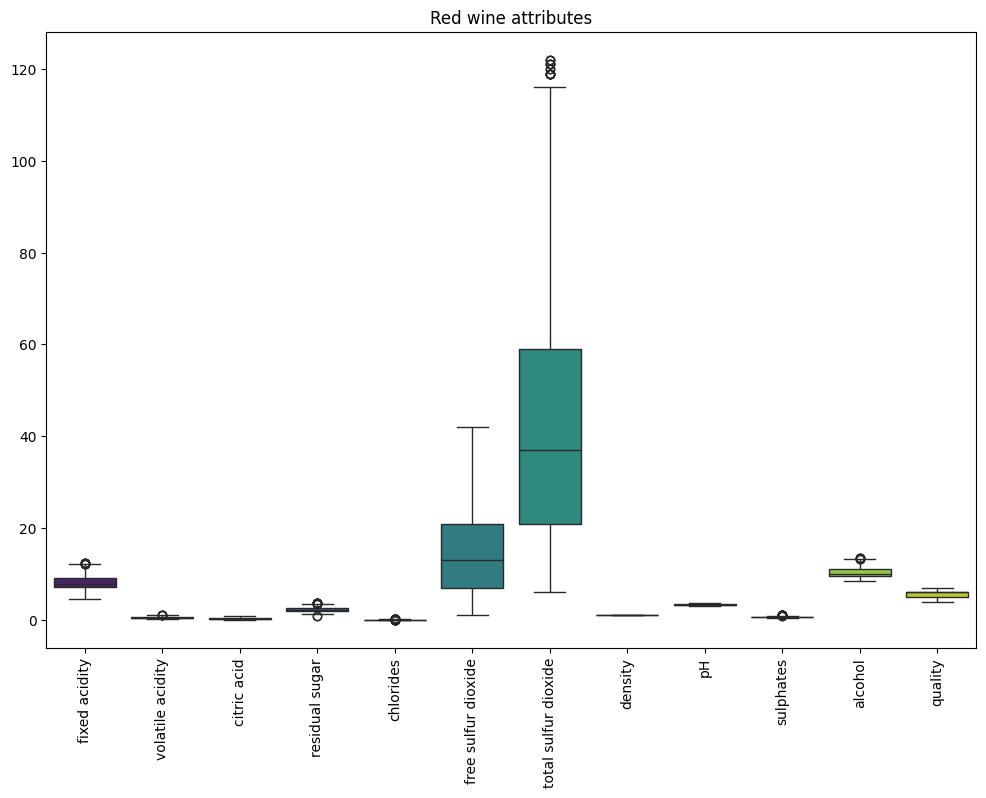

In [25]:
# Combined boxplot for all red wine attributes
plt.figure(figsize=(12, 8))
sns.boxplot(data=wines_red, palette="viridis")
plt.xticks(rotation=90)
plt.title("Red wine attributes")
plt.show()

### White Wines
This section displays a graph for each attribute for white wines in a boxplot as well as all of them side by side.

In [26]:
#White Wine Calulations
wines_white = pd.read_csv("winequality-white.csv", sep=';', header=0)
col_name = wines_white.columns.tolist()
print(col_name)

wines_white = remove_outliers(wines_white,col_name)

for col in col_name:
    wines_white[col] = pd.to_numeric(wines_white[col], errors='coerce')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [27]:
# Display white wine summaries for each subset of attributes
print(wines_white.iloc[:, 0:5].describe())
print(wines_white.iloc[:, 5:9].describe())
print(wines_white.iloc[:, 9:12].describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4779.000000       4712.000000  4628.000000     4891.000000   
mean        6.806058          0.265802     0.325022        6.354110   
std         0.747132          0.077972     0.089179        4.950545   
min         4.800000          0.080000     0.100000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.320000     0.380000        9.850000   
max         8.800000          0.485000     0.570000       22.000000   

         chlorides  
count  4690.000000  
mean      0.042374  
std       0.009916  
min       0.015000  
25%       0.035000  
50%       0.042000  
75%       0.049000  
max       0.071000  
       free sulfur dioxide  total sulfur dioxide      density           pH
count          4848.000000           4879.000000  4893.000000  4823.000000
mean             34.6

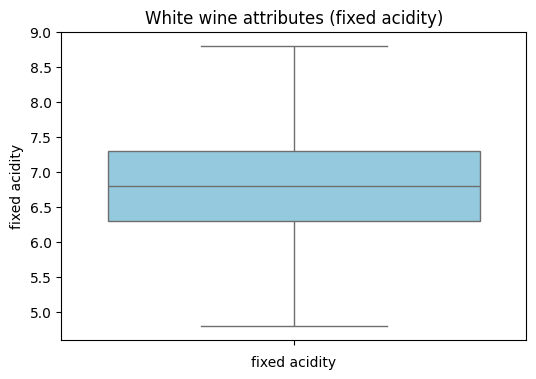

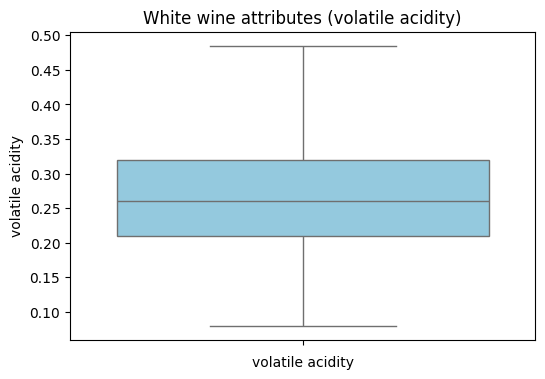

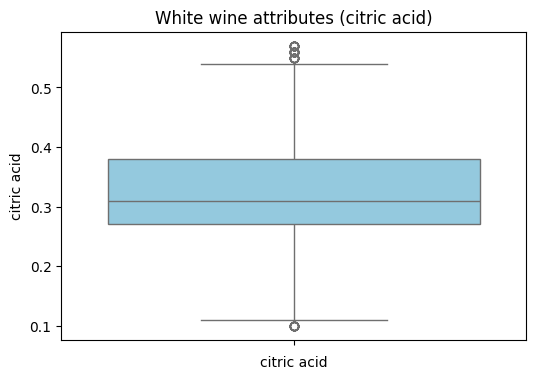

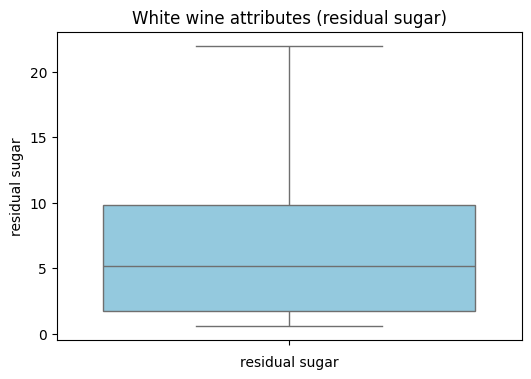

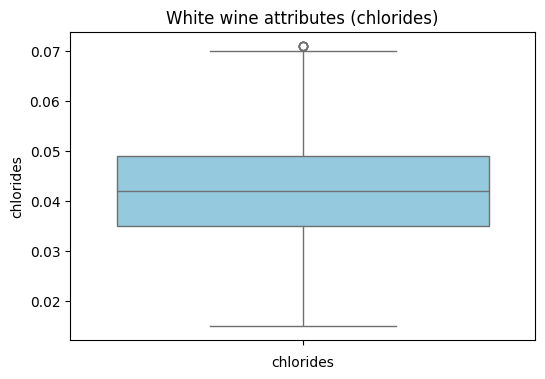

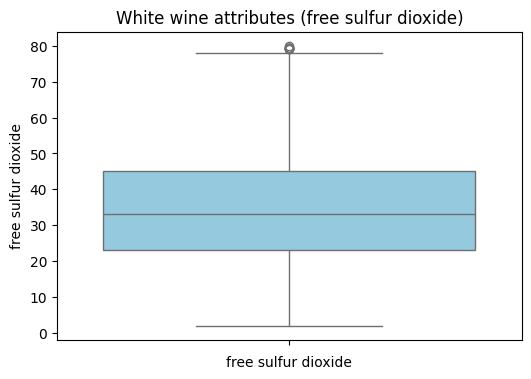

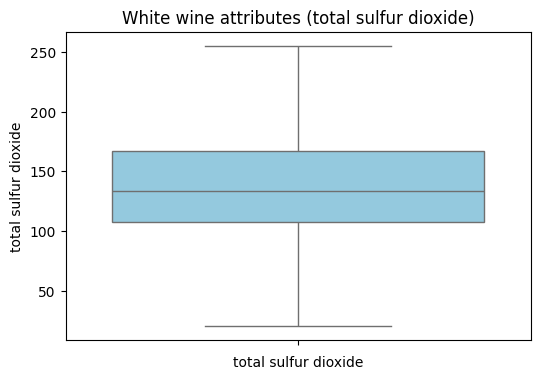

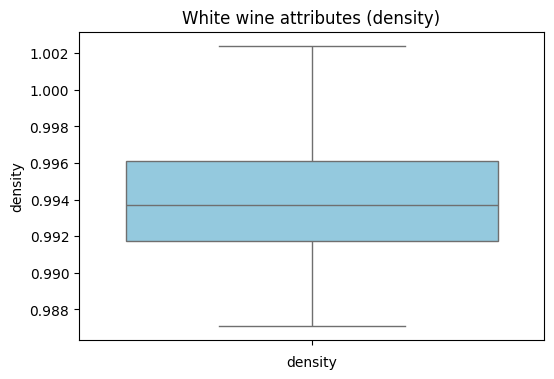

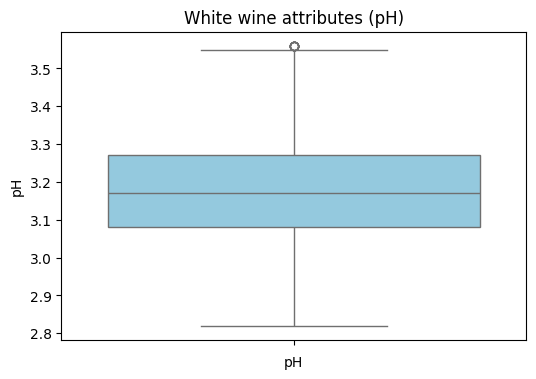

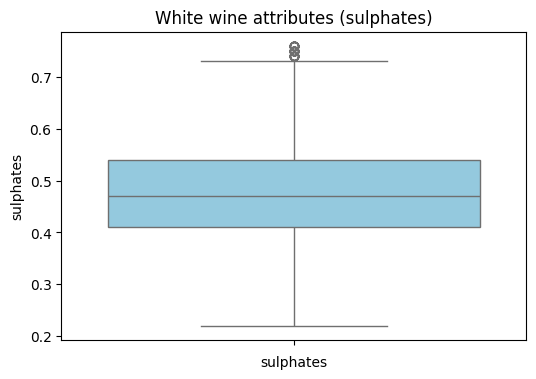

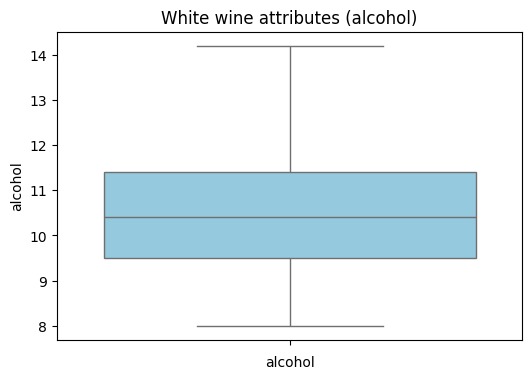

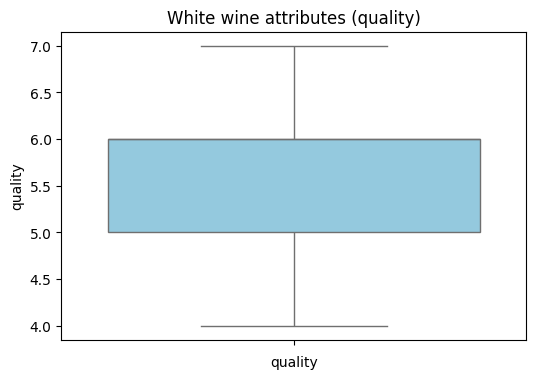

In [28]:
# Single boxplots for each white wine attributes
for i, col in enumerate(col_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=wines_white[col], color="skyblue")
    plt.title(f"White wine attributes ({col})")
    plt.xlabel(col)
    plt.show()

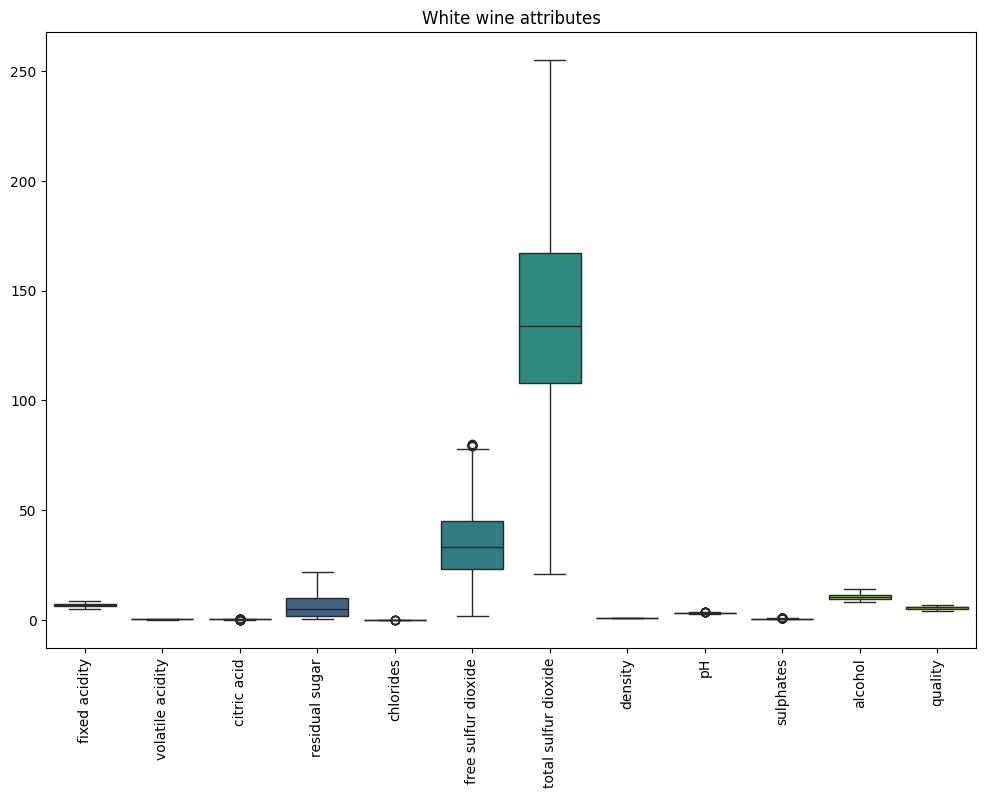

In [29]:
# Combined boxplot for all white wine attributes
plt.figure(figsize=(12, 8))
sns.boxplot(data=wines_white, palette="viridis")
plt.xticks(rotation=90)
plt.title("White wine attributes")
plt.show()

# Bar Plots

### Red Wines
This compares averages of each attribute to red wines to the quality of red wine

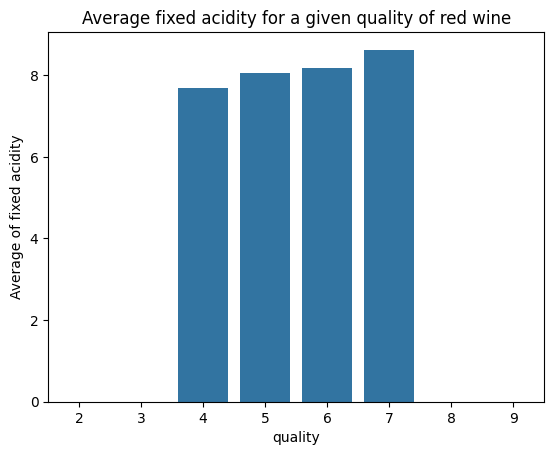

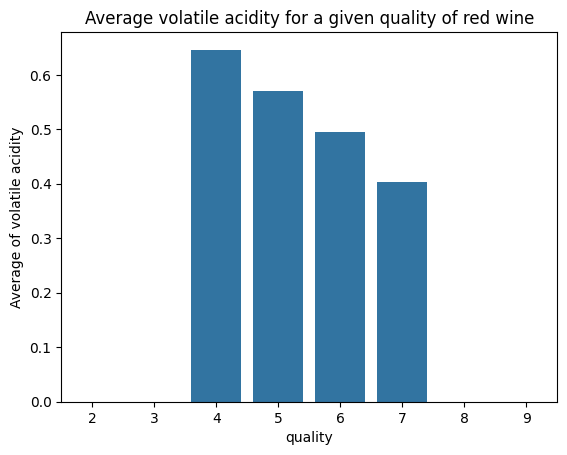

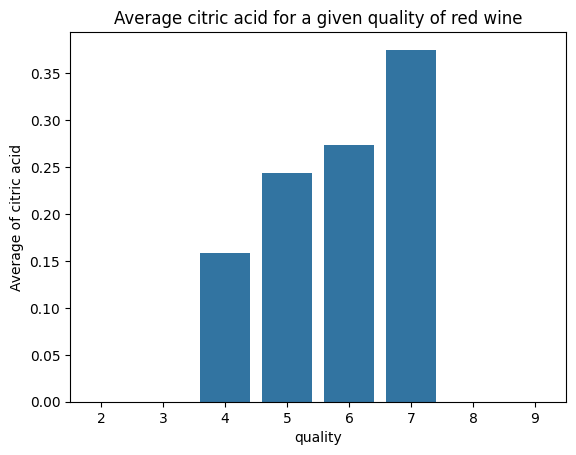

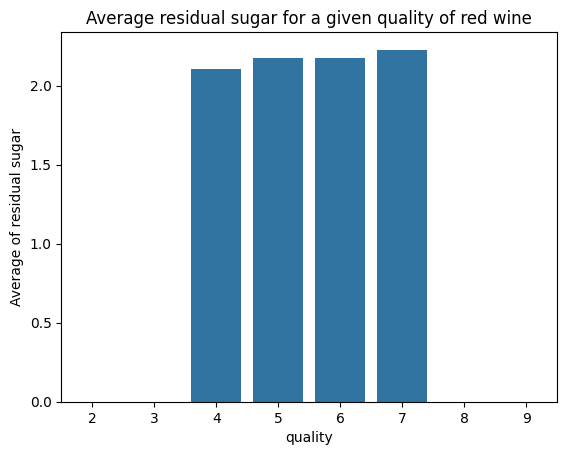

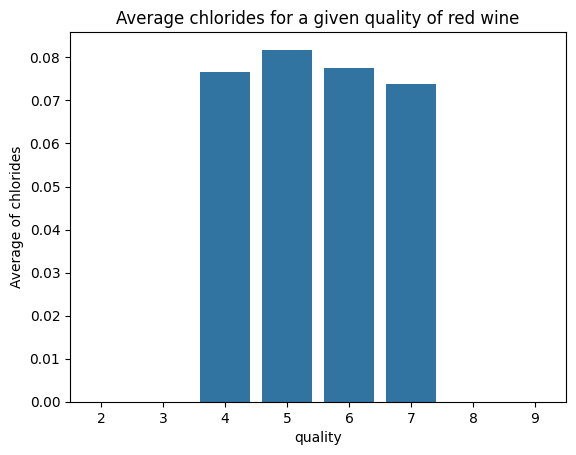

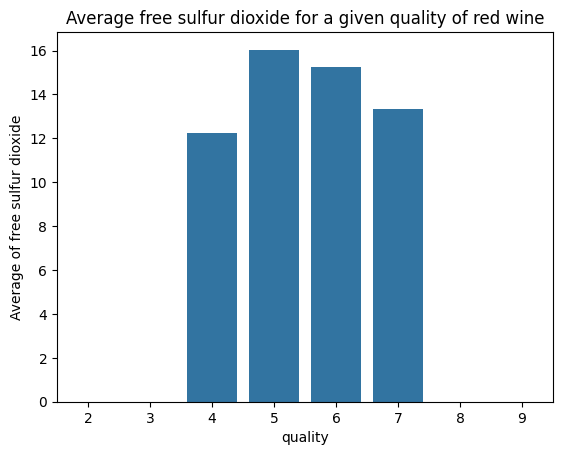

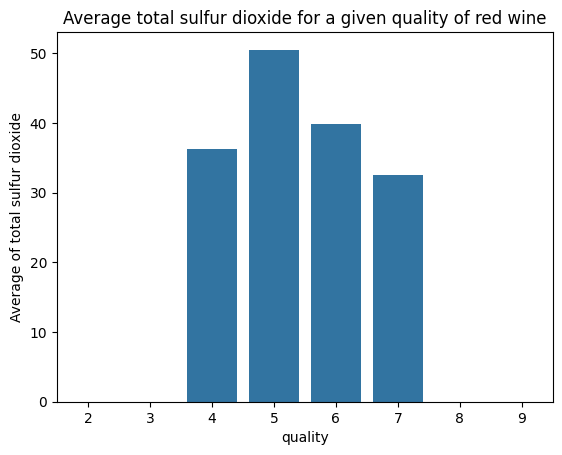

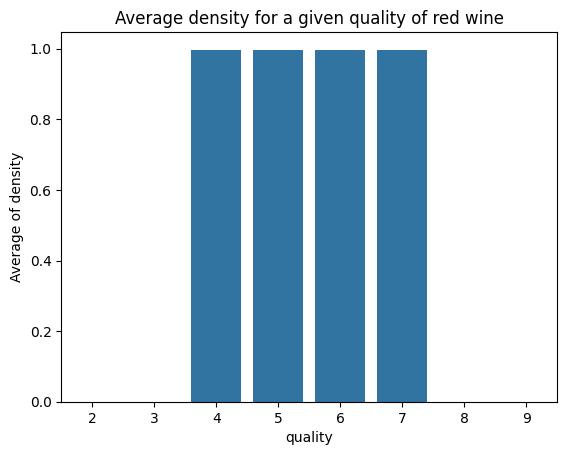

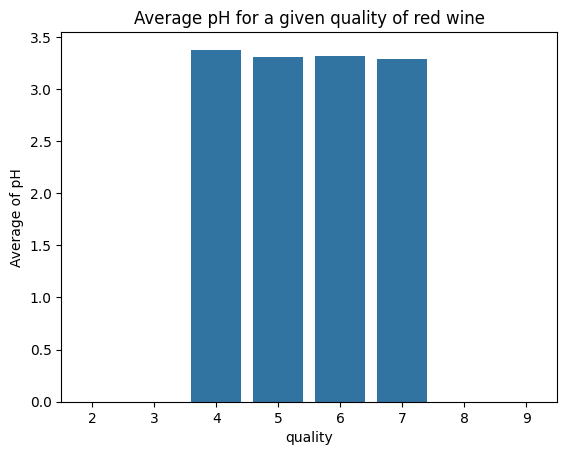

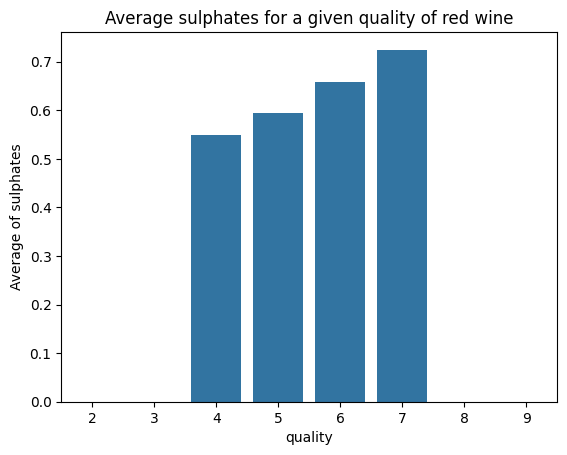

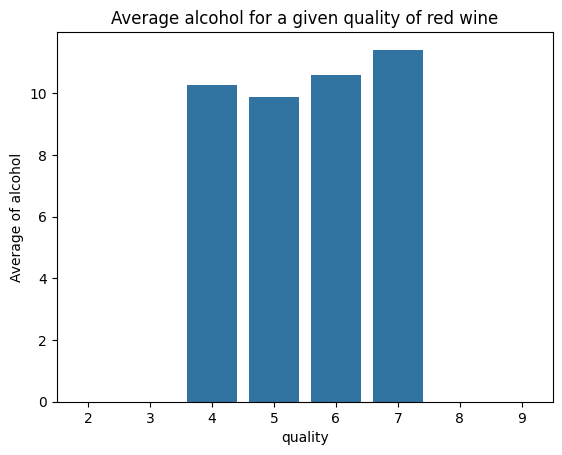

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Ensure all values from 1 to 10 are present in Column2
complete_range = pd.DataFrame({'quality': range(2, 10)})
wines_red_complete = pd.merge(complete_range, wines_red, on='quality', how='left')

# Barplots of each red wine attributes vs quality of wine
for attribute in col_name:
  if attribute != "quality":
    

    # Group and calculate average
    wine_averages = wines_red_complete.groupby('quality')[attribute].mean().reset_index()

    # Fill NaN with 0
    wine_averages[attribute] = wine_averages[attribute].fillna(0)

    sns.barplot(x='quality', y=attribute, data = wine_averages)
    plt.xlabel('quality')
    plt.ylabel('Average of '+attribute)
    plt.title('Average '+ attribute +' for a given quality of red wine')
    plt.show()


### White Wines

This compares averages of each attribute to white wines to the quality of white wine

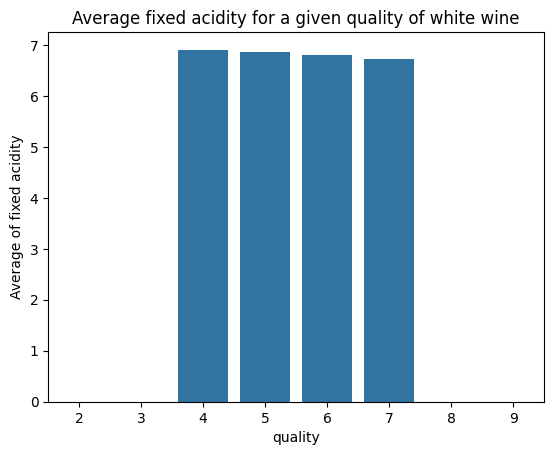

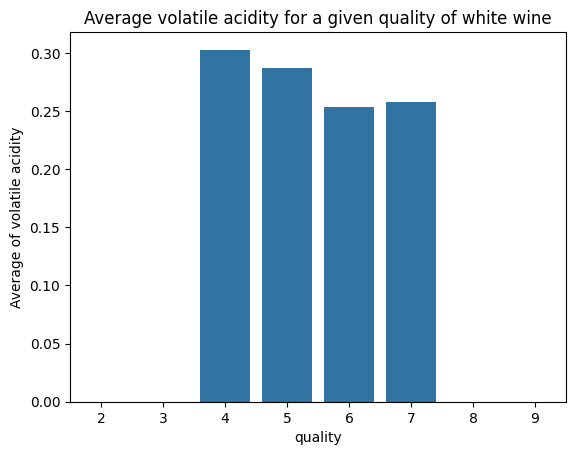

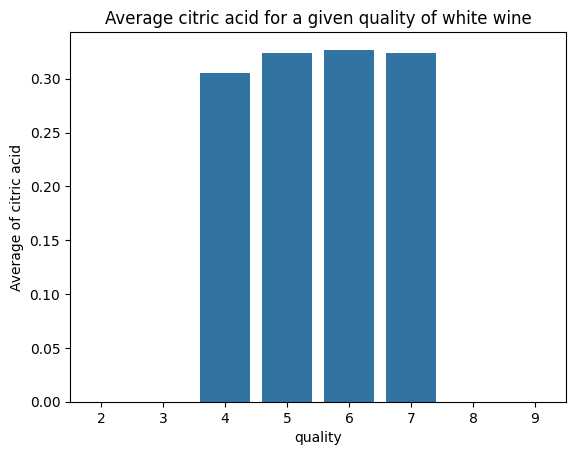

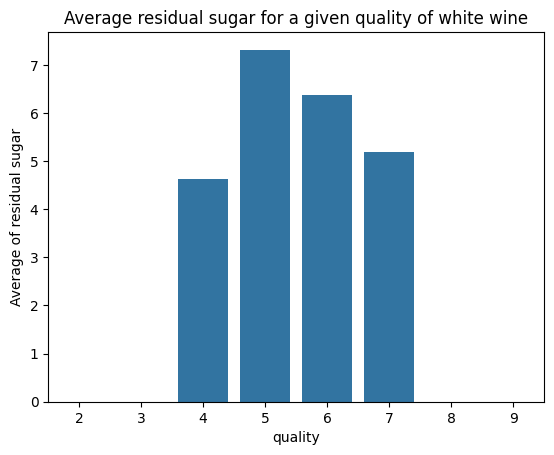

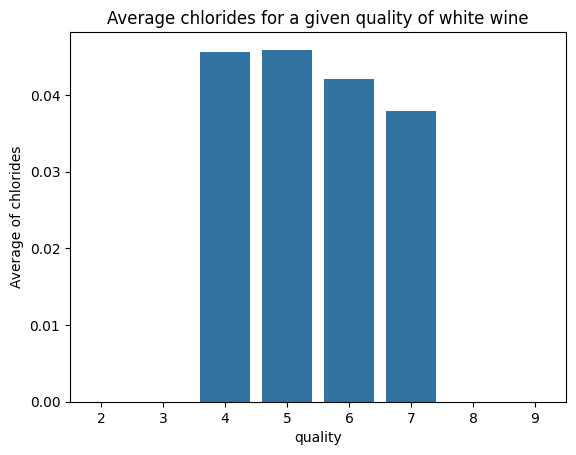

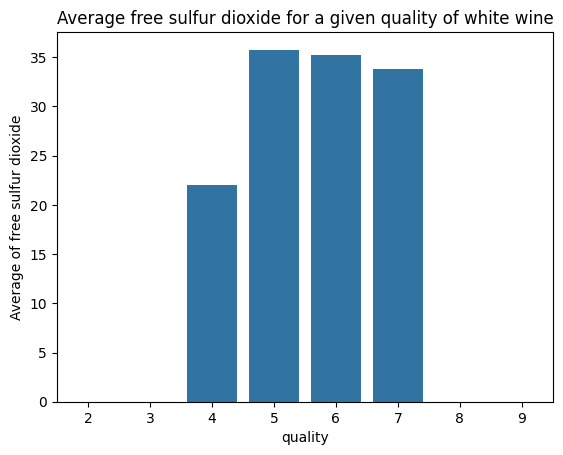

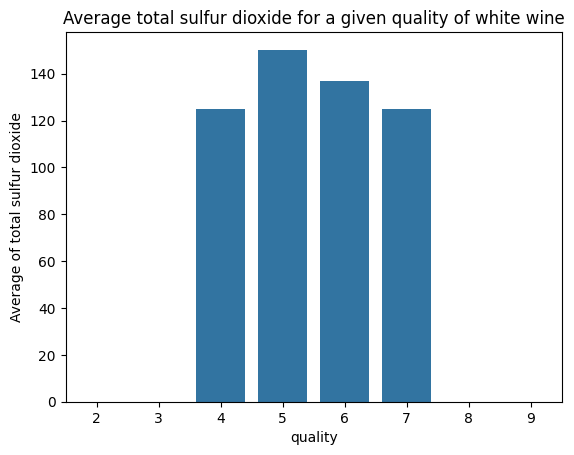

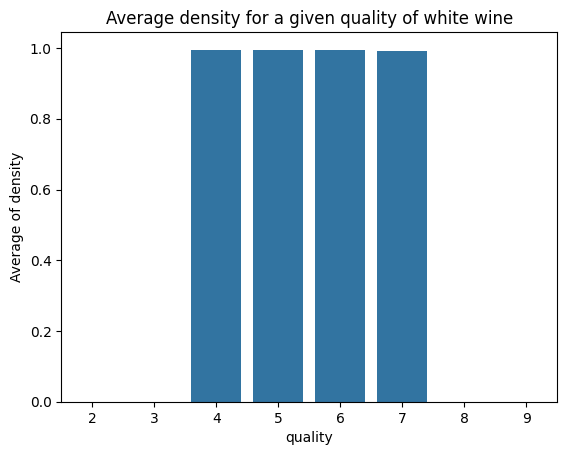

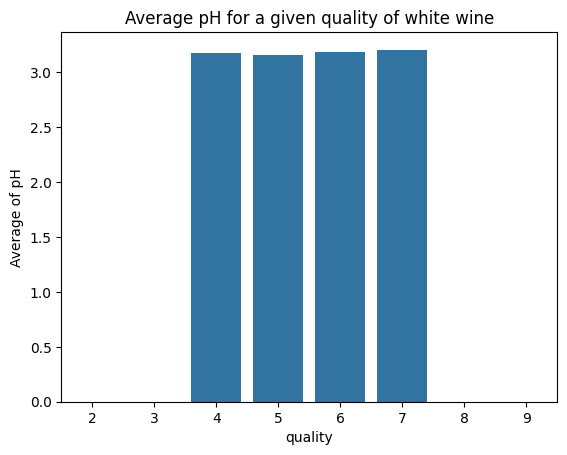

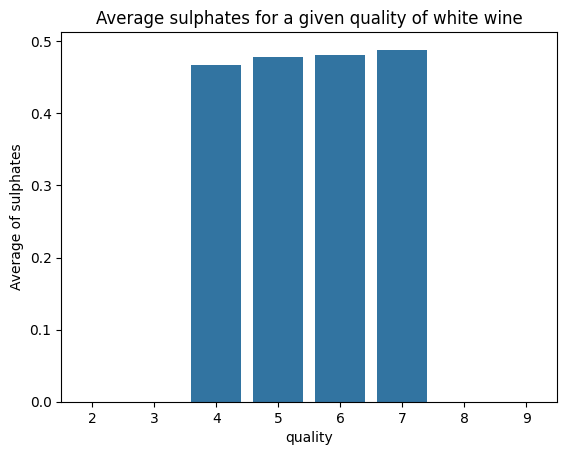

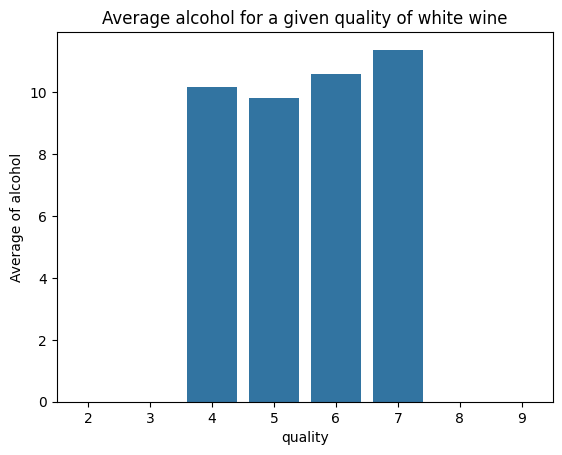

In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Ensure all values from 1 to 10 are present in Column2
complete_range = pd.DataFrame({'quality': range(2, 10)})
wines_white_complete = pd.merge(complete_range, wines_white, on='quality', how='left')

# Barplots of each white wine attributes vs quality of wine
for attribute in col_name:
  if attribute != "quality":
    

    # Group and calculate average
    wine_averages = wines_white_complete.groupby('quality')[attribute].mean().reset_index()

    # Fill NaN with 0
    wine_averages[attribute] = wine_averages[attribute].fillna(0)

    sns.barplot(x='quality', y=attribute, data = wine_averages)
    plt.xlabel('quality')
    plt.ylabel('Average of '+attribute)
    plt.title('Average '+ attribute +' for a given quality of white wine')
    plt.show()

# Histograms
These histogram will show the distribution of values across each wine attribute

### Red wines

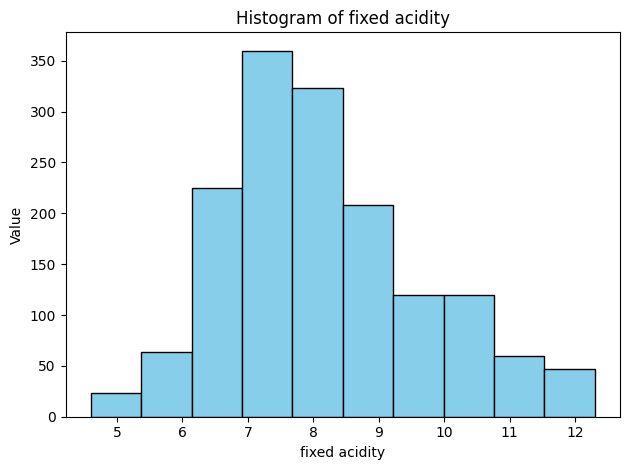

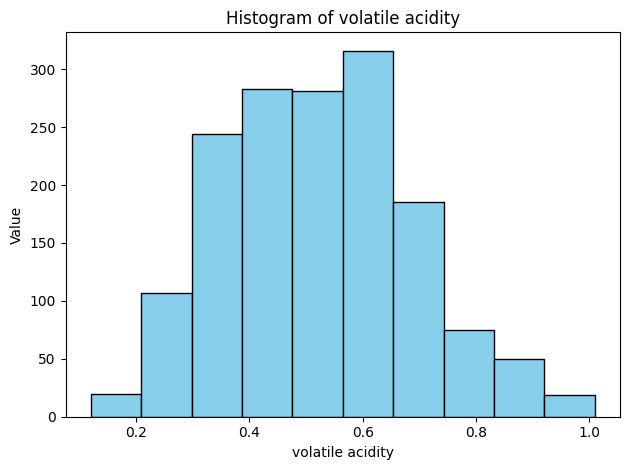

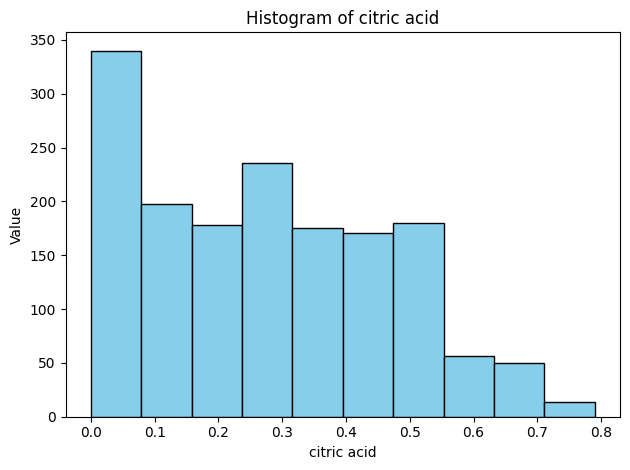

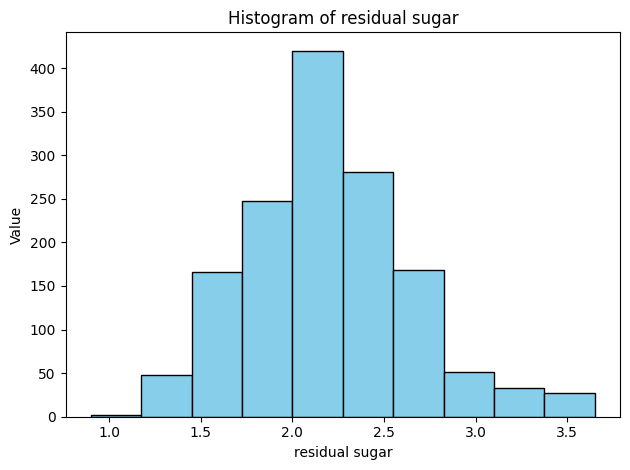

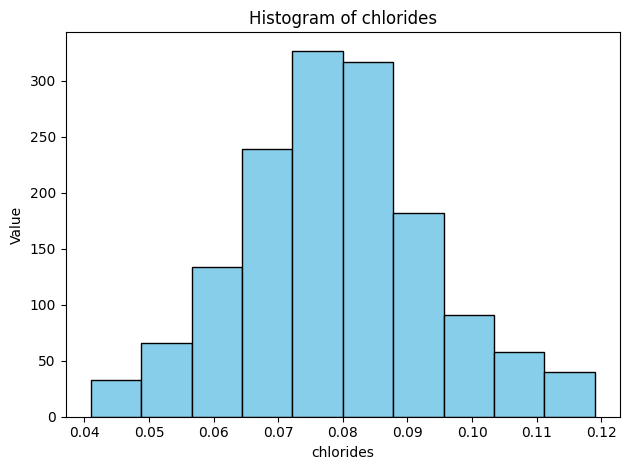

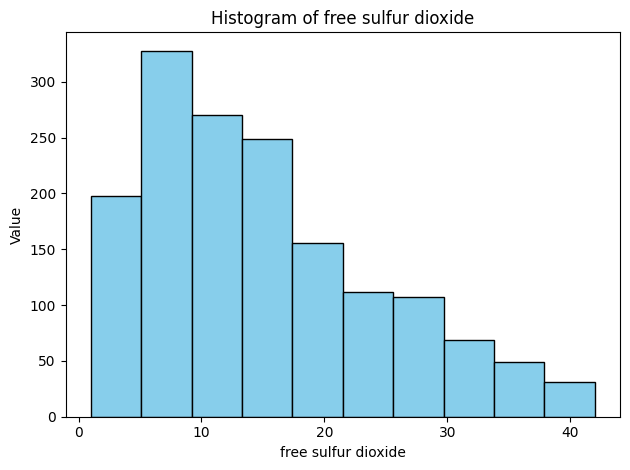

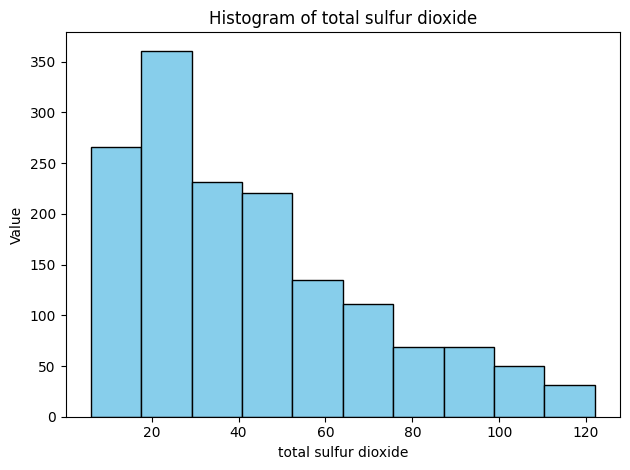

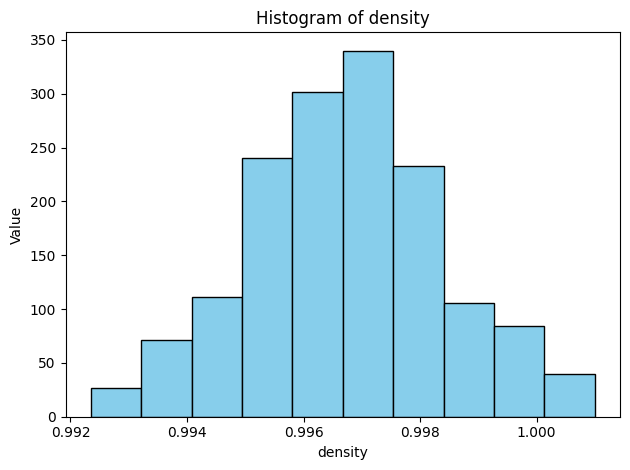

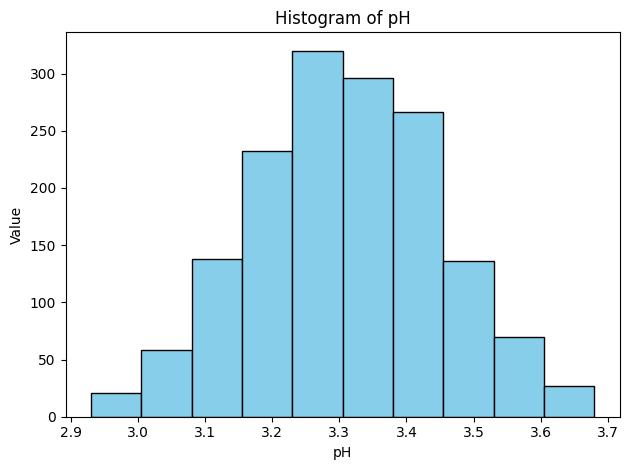

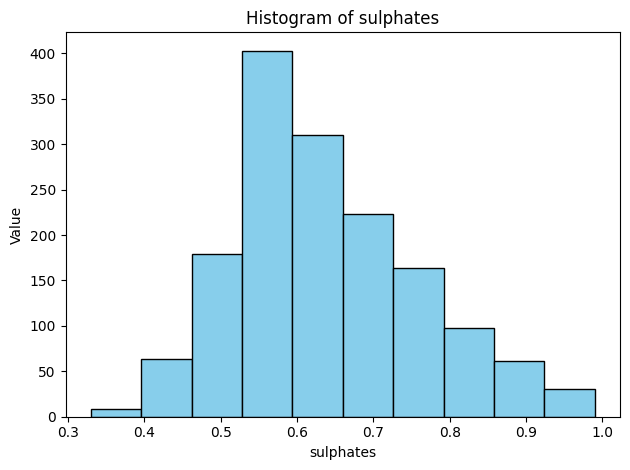

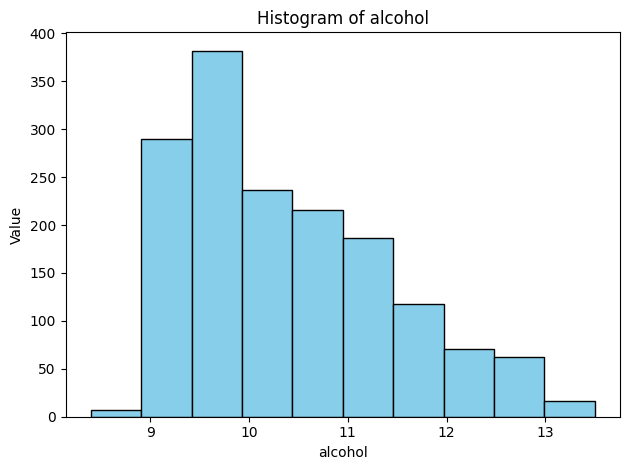

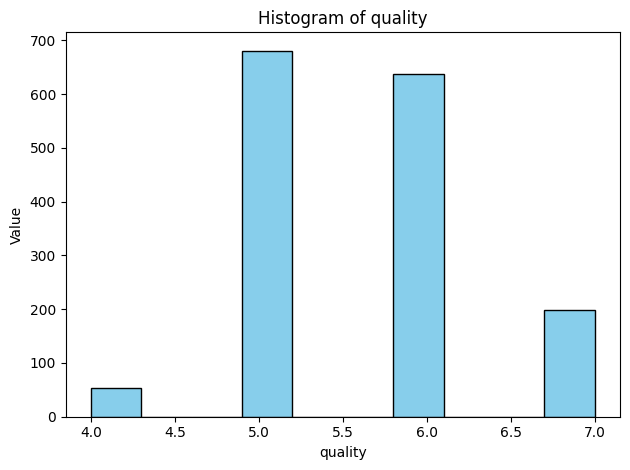

In [32]:
# import pandas as pd
# import matplotlib.pyplot as plt

for attribute in col_name:
    plt.hist(wines_red[attribute], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(attribute)
    plt.ylabel('Value')
    plt.title(f'Histogram of {attribute}')
    plt.tight_layout()  # Adjust layout
    plt.show()


### White Wines

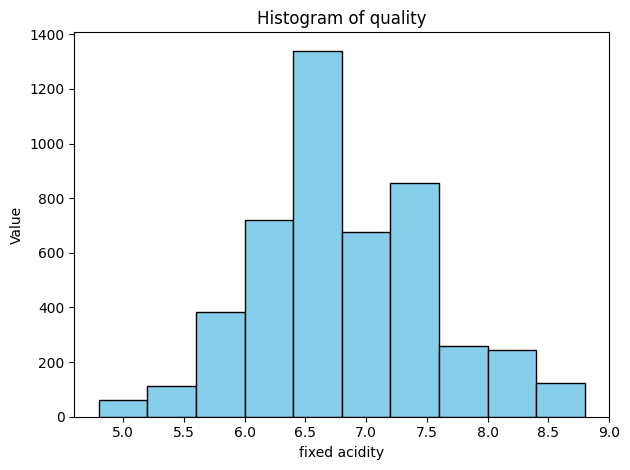

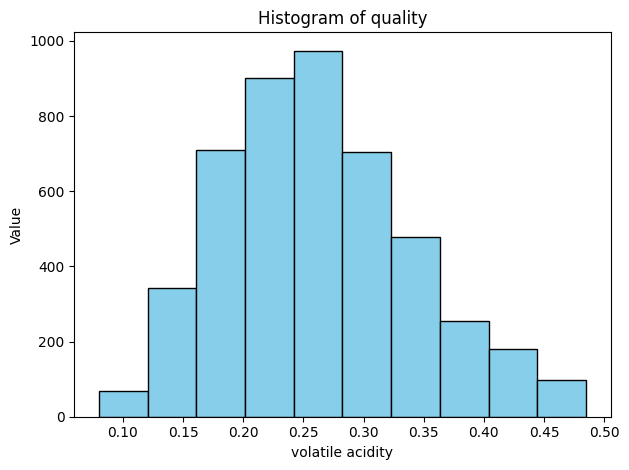

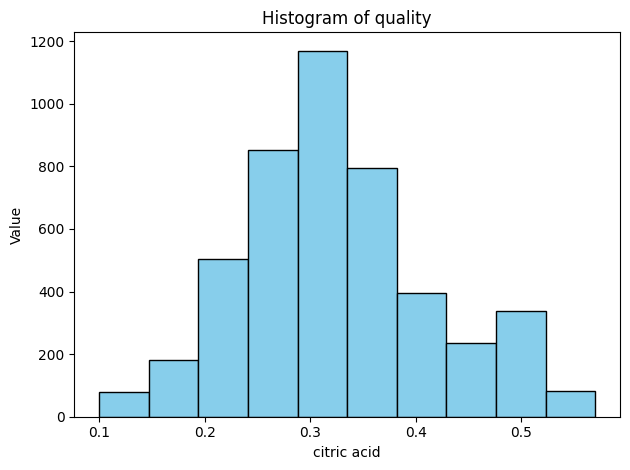

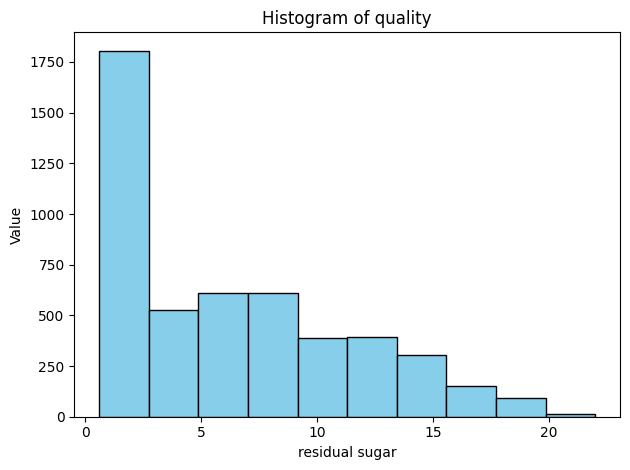

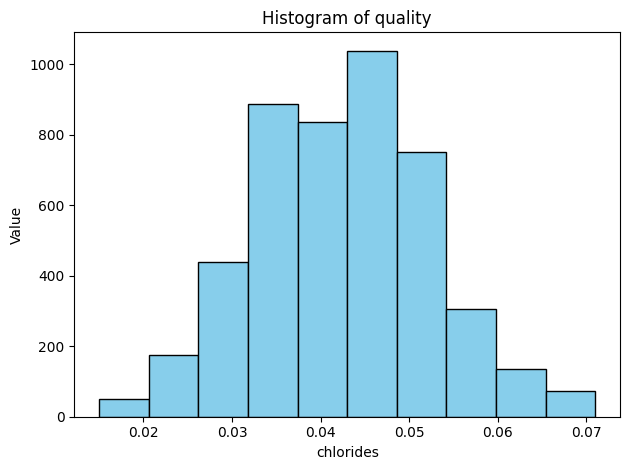

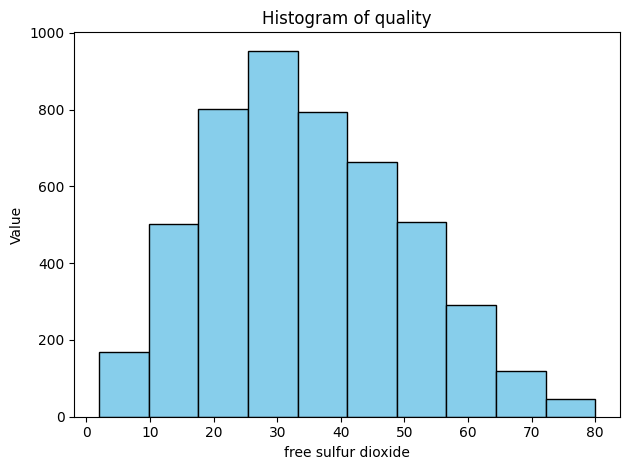

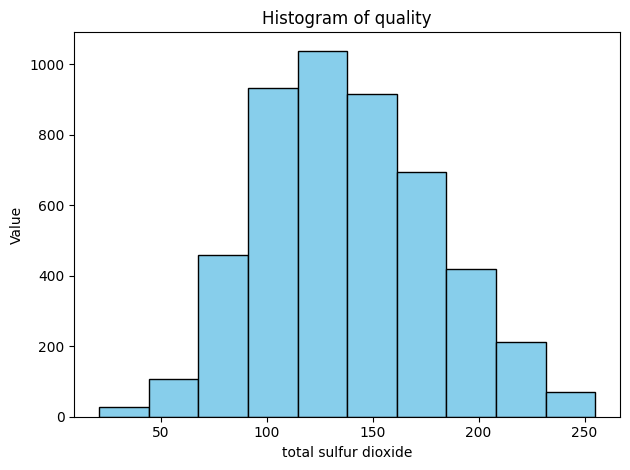

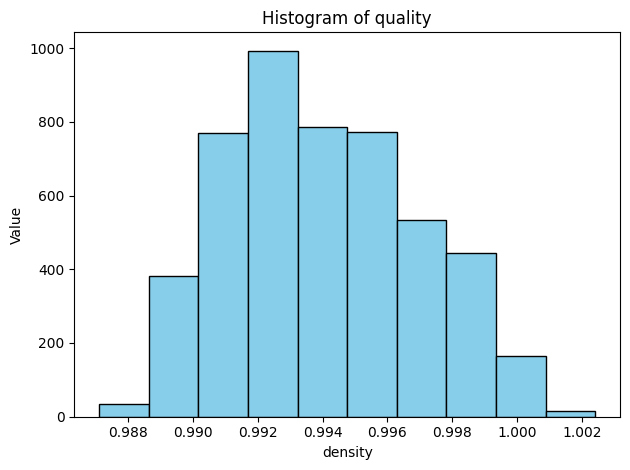

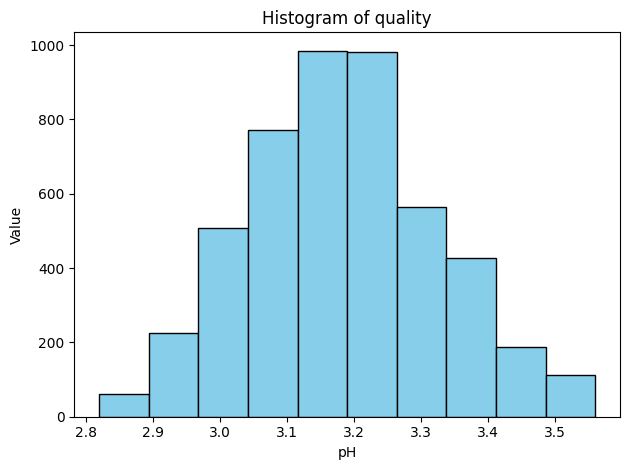

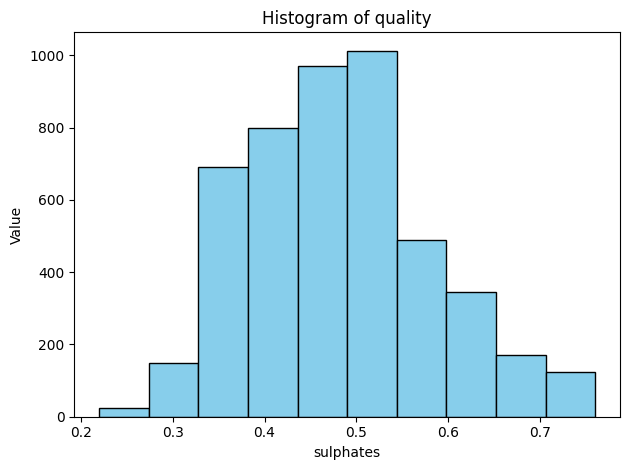

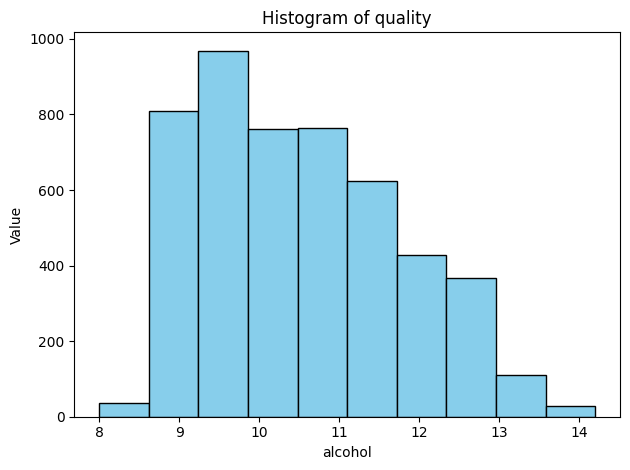

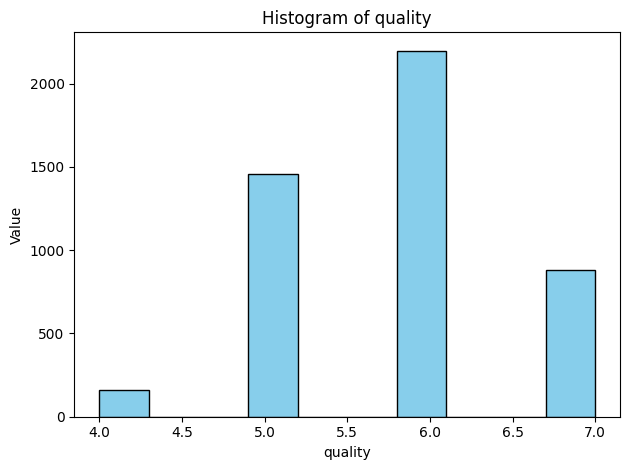

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt

for attribute in col_name:
    plt.hist(wines_white[attribute], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(attribute)
    plt.ylabel('Value')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()  # Adjust layout
    plt.show()